# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [62]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

import torch
from torch import nn


from IPython.display import clear_output
sns.set(palette='Set2')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \frac{2}{n}(\widehat{y}(X_i) - Y_i)$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = u_h(X_i)$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = 1$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = w_{2h}$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \frac{{e}^{-x}}{\left({{e}^{-x}+1}\right)^{2}} = \sigma(x) - \sigma^2(x)$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \frac{\partial \sigma(w_{1h}X_i + b_{1h})}{\partial w_{1h}} = \frac{\partial \sigma(w_{1h}X_i + b_{1h})}{\partial (w_{1h}X_i + b_{1h})} \frac{\partial (w_{1h}X_i + b_{1h})}{\partial w_{1h}} = \sigma'(w_{1h}X_i + b_{1h}) \cdot X_i$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \frac{\partial \sigma(w_{1h}X_i + b_{1h})}{\partial b_{1h}} = \frac{\partial \sigma(w_{1h}X_i + b_{1h})}{\partial (w_{1h}X_i + b_{1h})} \frac{\partial (w_{1h}X_i + b_{1h})}{\partial b_{1h}} = \sigma'(w_{1h}X_i + b_{1h})$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

Если выборка очень большая, то нужно прибечь к помощи SGD

Правила обновления параметра при GD:

$$\theta_t = \theta_{t - 1} - \eta ∇(\frac{1}{n}\sum_{i = 1}^nL(\widehat{y}_{\theta_{t - 1}}(x_i), Y_i))$$

Правила обновления параметра при SGD:

$$\theta_t = \theta_{t - 1} - \eta ∇(\frac{1}{B}\sum_{b = 1}^BL(\widehat{y}_{\theta_{t - 1}}(x_{i_b}), Y_{i_b}))$$

$B$ - батч (в вормуле $B$ - размер батча), $L$ - функция потерь

$B = \{i_1, ..., i_k\}$\
$i_1, ..., i_k \sim U\{1, ..., n\}$ возможны повторы

**Вывод:** Как можно увидеть, мы уже посчитали достаточно немало производных, а это всего для такой маленькой нейросети. Поэтому если нейросеть большая, то это может стать существенной проблемой. Чтобы упростить рассчеты и используется метод обратного распрастранения ошибки и SGD

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [29]:
# собираем модули в последовательность
model = nn.Sequential(
    nn.Linear(in_features = 1, out_features= 2),
    nn.Sigmoid(),
    nn.Linear(in_features = 2, out_features = 1)
)

model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [31]:
sample_size = int(1e3)
X = sps.norm.rvs(size=(sample_size, 1))
y = X**2  + 1

X_test = sps.norm.rvs(size=(sample_size, 1))
y_test = (X_test)**2 + 1

X_new = torch.FloatTensor(X).reshape(-1, 1)
y_new = torch.FloatTensor(y).reshape(-1, 1)

X_test_torch = torch.FloatTensor(X_test).reshape(-1, 1)
y_test_torch = torch.FloatTensor(y_test).reshape(-1, 1)


Обучите нейросеть на этих данных. Используйте код с занятия.

In [32]:
model(X_new)[:10]

tensor([[0.2750],
        [0.1928],
        [0.2616],
        [0.2429],
        [0.2452],
        [0.3560],
        [0.3208],
        [0.2241],
        [0.2557],
        [0.2079]], grad_fn=<SliceBackward0>)

In [33]:
def show_progress(x, y, y_pred, loss):
    '''
    Визуализация процесса обучения.

    x, y -- объекты и таргеты обучающей выборки;
    y_pred -- предсказания модели;
    loss -- текущее значение ошибки модели.
    '''

    # Открепим переменную от вычислительного графа перед отрисовкой графика
    y_pred = y_pred.detach()

    # Превратим тензор размерности 0 в число
    loss = loss.item()

    # Стираем предыдущий вывод в тот момент, когда появится следующий
    clear_output(wait=True)

    # Строим новый график
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.75)
    plt.scatter(x, y_pred, color='orange', linewidth=5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Нейросеть, написанная на Pytorch')
    plt.show()

    print(f"MSE = {loss:.3f}")

In [34]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()

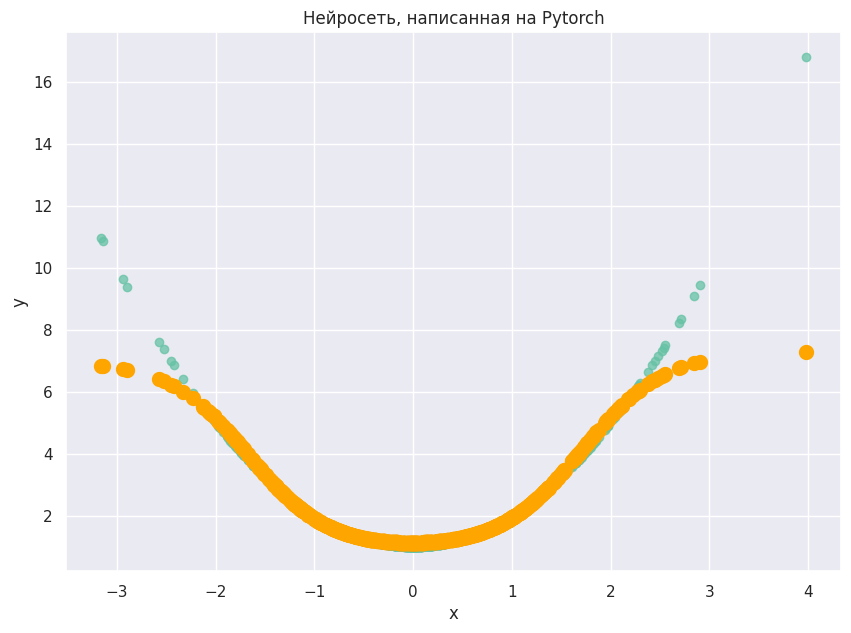

MSE = 0.027


In [35]:
# Количество итераций
num_iter = 10000
batch_size = 128
for i in range(num_iter):
    batch = np.random.choice(len(X), batch_size)
    # Forward pass: предсказание модели по данным x_new
    y_pred = model(X_new[batch])


    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_new[batch])

    # Bakcward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()
y_pred = model(X_new)
show_progress(X, y, y_pred, loss)

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

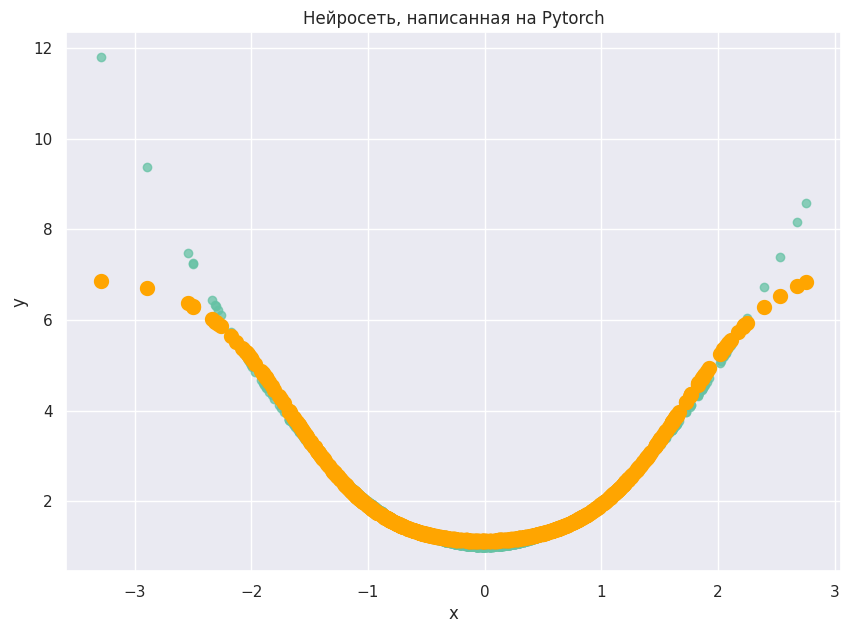

MSE = 0.049


In [36]:
y_pred1 = model(X_test_torch)
show_progress(X_test, y_test, y_pred1, optim_func(y_pred1, y_test_torch))

**Вывод:** нейросети помогают приближать нелинейные функции гораздо лучше, чем линейные модели (хотя конечно нелинейную функцию нельзя хорошо приблизить линейной). Но наша модель имеет только один нелинейный слой, поэтому она похожа на сигмоиду

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [22]:

class MyTorch:
    def __init__(self, X, Y, lr=0.01):

      self.X = X
      self.Y = Y
      self.lr = lr
      self.w_1 = np.random.randn(1, 2)
      self.b_1 = np.random.randn(1, 2)
      self.w_2 = np.random.randn(2, 1)
      self.b_2 = np.random.randn()

    def sigmoida(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoida_der(self, x):
        return self.sigmoida(x) - self.sigmoida(x) * self.sigmoida(x)

    def found_batch(self, batch_size=None):
        if batch_size:
          return batch_size, np.random.choice(len(self.X), batch_size)
        return len(self.X), np.array(range(len(self.X)))

    def back_prop(self, batch_size = None):
        new_batch_size, batch = self.found_batch(batch_size)
        X_now = self.X[batch]

        dy_dw2 = self.sigmoida(X_now @ self.w_1 + self.b_1)
        final = dy_dw2 @ self.w_2 + self.b_2
        dmse_dy = 2/(batch_size) * (final - self.Y[batch])

        dy_db2 = np.ones_like(dmse_dy)
        dy_du = (self.w_2.T).repeat((batch_size), axis = 0)

        dmse_dw2 = (dmse_dy.T @ dy_dw2).T
        dmse_db2 = dmse_dy.T @ dy_db2
        dmse_du = dmse_dy.T @ dy_du

        du_dw1 = self.sigmoida_der(X_now @ self.w_1 + self.b_1) * self.X[batch]
        du_db1 = self.sigmoida_der(X_now @ self.w_1 + self.b_1)

        dmse_dw1 = np.diag((dmse_dy * dy_du).T @ du_dw1)
        dmse_db1 = np.diag((dmse_dy * dy_du).T @ du_db1)

        self.w_1 -= dmse_dw1.reshape(1, 2) * self.lr
        self.b_1 -= dmse_db1.reshape(1, 2) * self.lr
        self.w_2 -= dmse_dw2 * self.lr
        self.b_2 -= dmse_db2 * self.lr
        return final

    def fit(self, steps=10000, batch_size=None):
        for i in range(steps):
            y_pred = self.back_prop(batch_size)

    def predict(self, X):
      return self.sigmoida(X @ self.w_1 + self.b_1) @ self.w_2 + self.b_2


Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

In [37]:
sample_size = int(1e3)
X = sps.norm.rvs(size=(sample_size, 1))
y = X**2  + 1

np_model = MyTorch(X, y, 0.01)

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

In [24]:
def show_progress_np(x, y, y_pred, loss, text):
    clear_output(wait=True)

    # Строим новый график
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.75)
    plt.scatter(x, y_pred, color='orange', linewidth=5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(text)
    plt.show()

    print(f"MSE = {loss:.3f}")

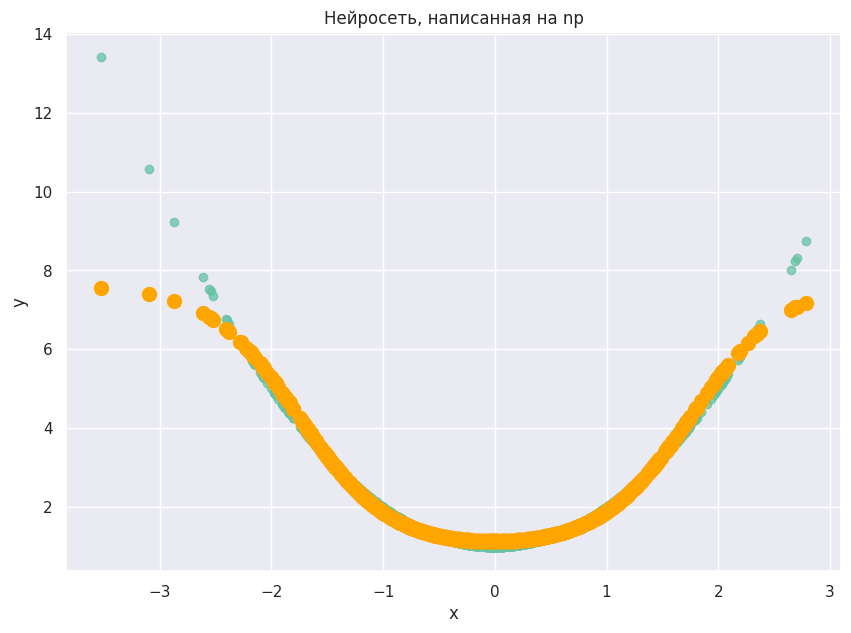

MSE = 0.069


In [38]:
X_test = sps.norm.rvs(size=(sample_size, 1))
y_test = X_test**2  + 1
steps = 10000

np_model.fit(batch_size=128)

y_pred_model = np_model.predict(X_test)
text = "Нейросеть, написанная на np"
show_progress_np(X_test, y_test, y_pred_model, metrics.mean_squared_error(y_test, y_pred_model), text)

Как видим, написанная на np нейросеть неплохо справляется с приближением функции

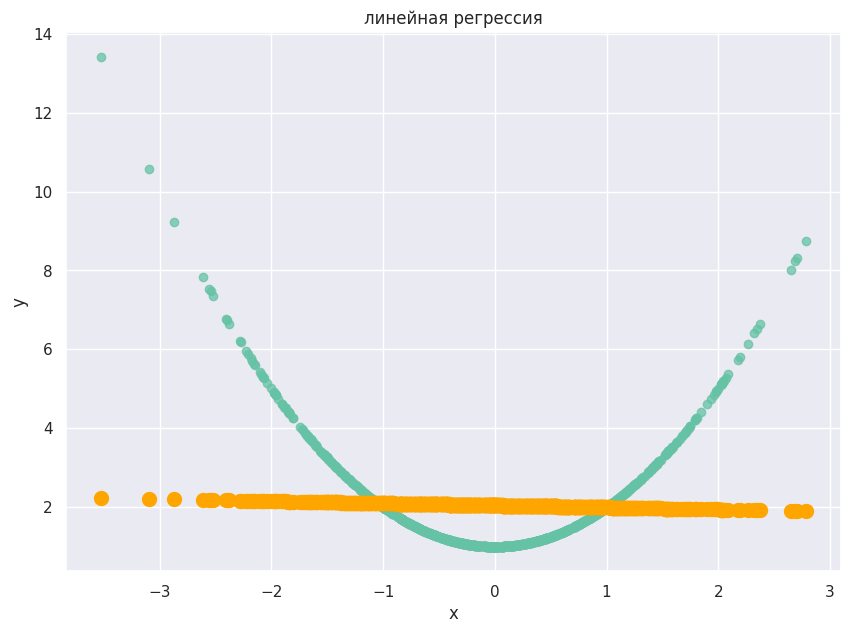

MSE = 1.815


In [39]:
model_lin_exp = LinearRegression().fit(X, y)

y_pred = model_lin_exp.predict(X_test)
loss = metrics.mean_squared_error(y_pred, y_test)
text = "линейная регрессия"
show_progress_np(X_test, y_test, y_pred, loss, text)

К сожалению линейная регрессия неспособна приблизить параболу

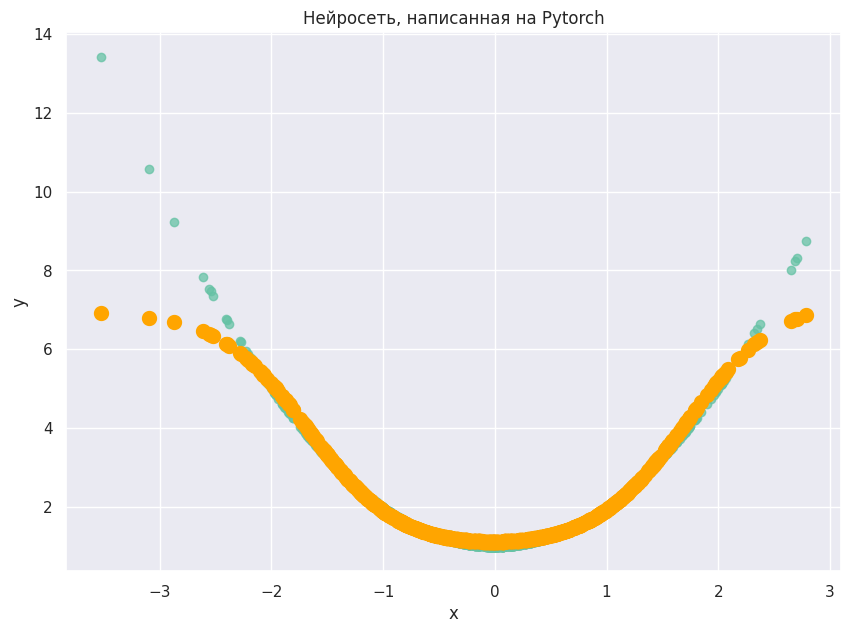

MSE = 0.088


In [40]:
X_test_torch = torch.FloatTensor(X_test).reshape(-1, 1)
y_test_torch = torch.FloatTensor(y_test).reshape(-1, 1)
y_pred1 = model(X_test_torch)
show_progress(X_test, y_test, y_pred1, optim_func(y_pred1, y_test_torch))

Нейросеть из torch лучше всего справляется с приближением функции

Повторите вычисления для другой нелинейной функции: $y(x) = cos(x) \cdot x - x$

In [41]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.cos(X) * X - X

X_test = sps.norm.rvs(size=(sample_size, 1))
y_test = np.cos(X_test) * X_test - X_test

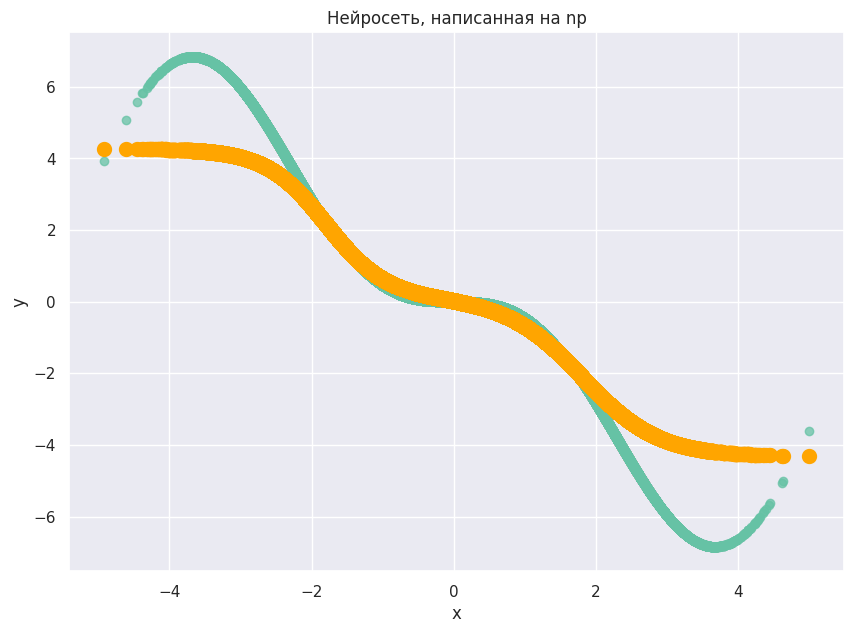

MSE = 0.068


In [44]:
np_model = MyTorch(X, y, 0.01)
np_model.fit(batch_size=128)


y_pred_model = np_model.predict(X_test)
text = "Нейросеть, написанная на np"
show_progress_np(X_test, y_test, y_pred_model, metrics.mean_squared_error(y_test, y_pred_model), text)

Функция хорошо приближается

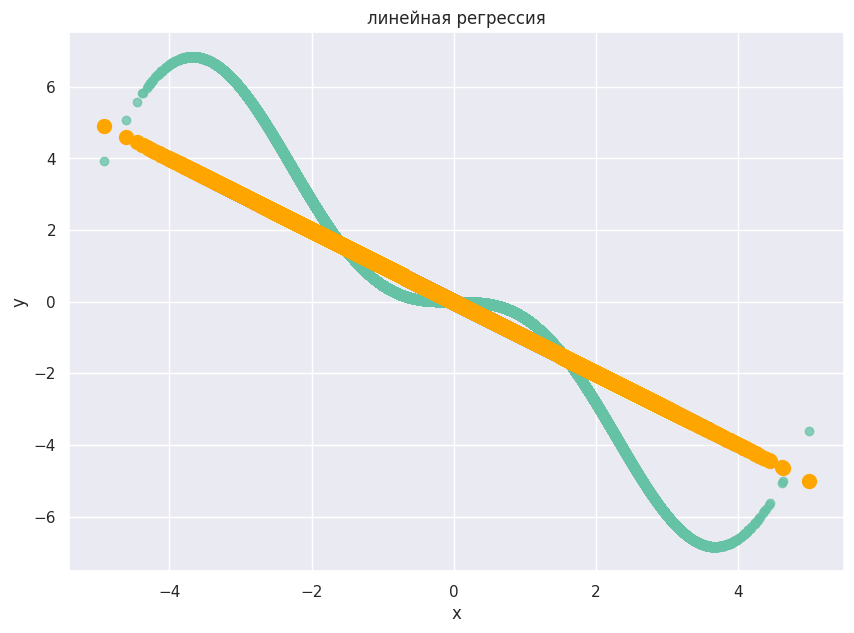

MSE = 0.298


In [45]:
model_lin_exp = LinearRegression().fit(X, y)

y_pred = model_lin_exp.predict(X_test)
loss = metrics.mean_squared_error(y_pred, y_test)
text = "линейная регрессия"
show_progress_np(X_test, y_test, y_pred, loss, text)

как ни странно, но эту функцию даже линейная регрессия приближает с достаточно небольшой ошибкой. Но это лишь из за того, что в данной окрестности функция похожа на обратную пропорциональность

In [46]:
model = nn.Sequential(
    nn.Linear(in_features = 1, out_features= 2),
    nn.Sigmoid(),
    nn.Linear(in_features = 2, out_features = 1)
)


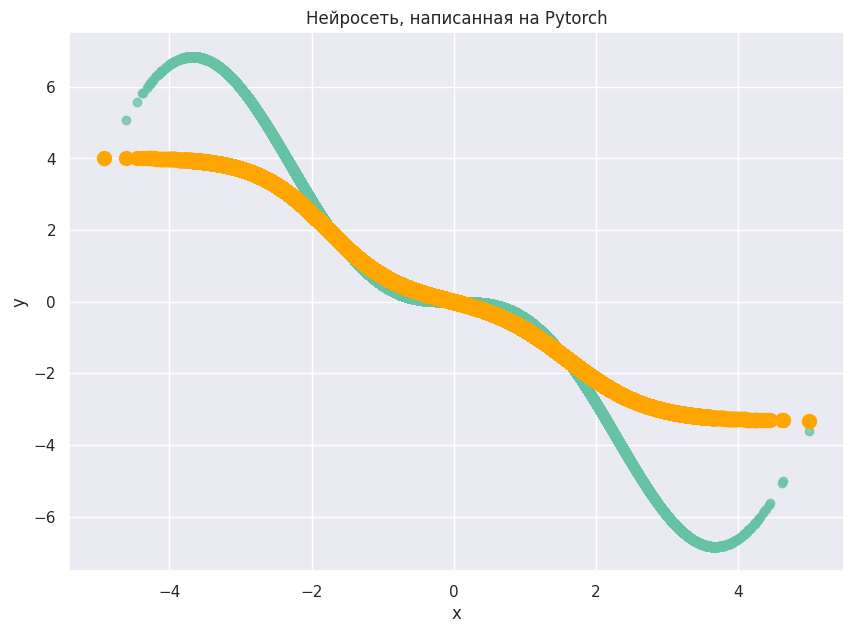

MSE = 0.148


In [47]:
X_new = torch.FloatTensor(X).reshape(-1, 1)
y_new = torch.FloatTensor(y).reshape(-1, 1)

X_test_torch = torch.FloatTensor(X_test).reshape(-1, 1)
y_test_torch = torch.FloatTensor(y_test).reshape(-1, 1)

model(X_new)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()

# Количество итераций
num_iter = 10000
batch_size = 128
for i in range(num_iter):
    batch = np.random.choice(len(X), batch_size)
    y_pred = model(X_new[batch])

    loss = optim_func(y_pred, y_new[batch])
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
y_pred = model(X_test_torch)
show_progress(X_test, y_test, y_pred, loss)

Неплохое приближение

**Вывод:** С помощью нейросетей можно приближать довольно сложные нелинейные функции, что довольно круто. В то время как, например, модель линейной регрессии неспособна на это. Из за того, в этой работе использовались нейросети с двумя слоями и одной функцией активации, то чтобы график не был похож на сигмоиду нужно было ждать не маленькое количество эпох